# Instagram Influencers Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
import os

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

os.makedirs('visualizations', exist_ok=True)
os.makedirs('data', exist_ok=True)

print("Libraries loaded!")

Libraries loaded!


## 1. Load Data

In [2]:
df = pd.read_csv('/content/top_insta_influencers_data.csv')
print(f"Loaded {len(df)} records")
df.head(10)

Loaded 200 records


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,62


## 2. Data Cleaning

In [5]:
# convert columns like '475.8m' to numbers
cols_to_fix = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

for col in cols_to_fix:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('b', 'e9', regex=False)
    df[col] = df[col].str.replace('m', 'e6', regex=False)
    df[col] = df[col].str.replace('k', 'e3', regex=False)
    df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['country'] = df['country'].fillna('Unknown')
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].median())

print("Done!")
print(f"Cristiano followers: {df.loc[0, 'followers']:,.0f}")

Done!
Cristiano followers: 475,800,000


In [6]:
df.to_csv('data/cleaned_data.csv', index=False)
print("Saved cleaned data")

Saved cleaned data


In [7]:
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02
mean,100.500000,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.896900,1.208132e+06,3.658112e+09
std,57.879185,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.322129,1.858322e+06,5.561939e+09
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,50.750000,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08
50%,100.500000,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09
75%,150.250000,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.032500,1.325000e+06,3.900000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


## 3. Basic Stats

In [8]:
print(f"Total influencers: {len(df)}")
print(f"Countries: {df['country'].nunique()}")
print(f"Avg followers: {df['followers'].mean():,.0f}")
print(f"Avg engagement: {df['60_day_eng_rate'].mean():.2f}%")
print(f"Influence score range: {df['influence_score'].min()} - {df['influence_score'].max()}")

Total influencers: 200
Countries: 26
Avg followers: 77,409,500
Avg engagement: 1.90%
Influence score range: 22 - 93


## 4. Visualizations

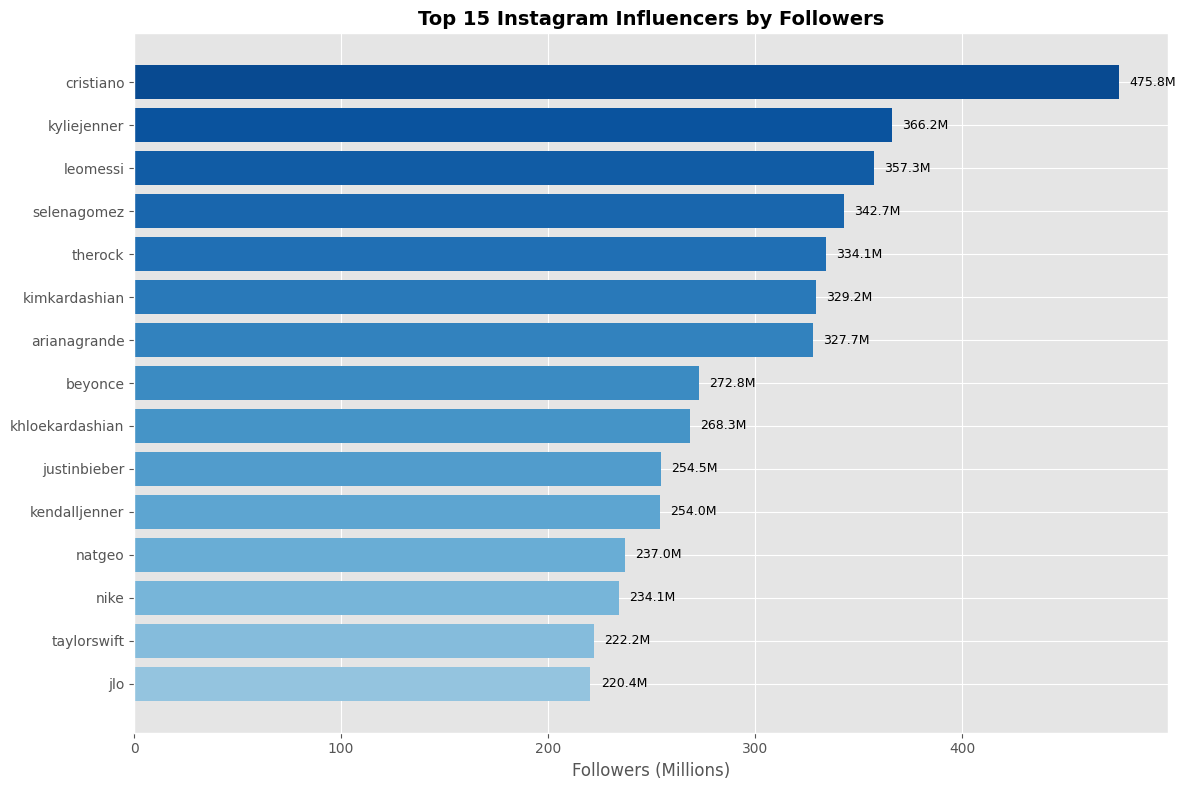

In [9]:
# Top 15 by followers
fig, ax = plt.subplots(figsize=(12, 8))
top15 = df.nlargest(15, 'followers')
colors = plt.cm.Blues(np.linspace(0.4, 0.9, 15))[::-1]
bars = ax.barh(top15['channel_info'], top15['followers']/1e6, color=colors)
ax.set_xlabel('Followers (Millions)', fontsize=12)
ax.set_title('Top 15 Instagram Influencers by Followers', fontsize=14, fontweight='bold')
ax.invert_yaxis()
for i, (bar, val) in enumerate(zip(bars, top15['followers']/1e6)):
    ax.text(val + 5, bar.get_y() + bar.get_height()/2, f'{val:.1f}M', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('visualizations/01_top15_followers.png', dpi=150)
plt.show()

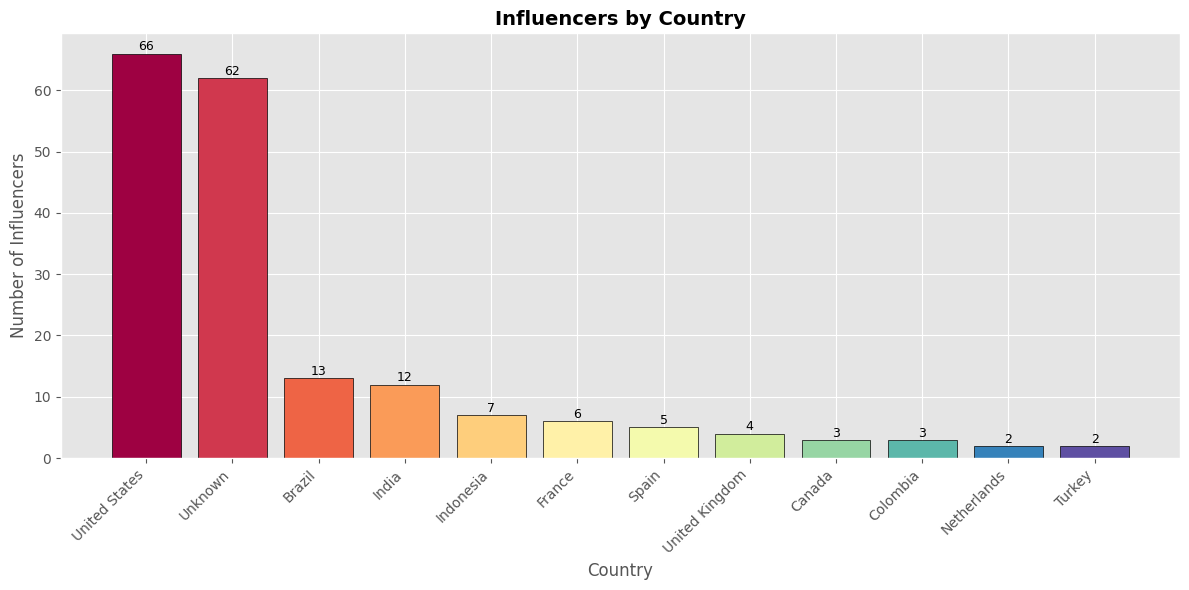

In [10]:
# Country distribution
fig, ax = plt.subplots(figsize=(12, 6))
country_counts = df['country'].value_counts().head(12)
colors = plt.cm.Spectral(np.linspace(0, 1, 12))
bars = ax.bar(country_counts.index, country_counts.values, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Influencers', fontsize=12)
ax.set_title('Influencers by Country', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, int(bar.get_height()), ha='center', fontsize=9)
plt.tight_layout()
plt.savefig('visualizations/02_country_distribution.png', dpi=150)
plt.show()

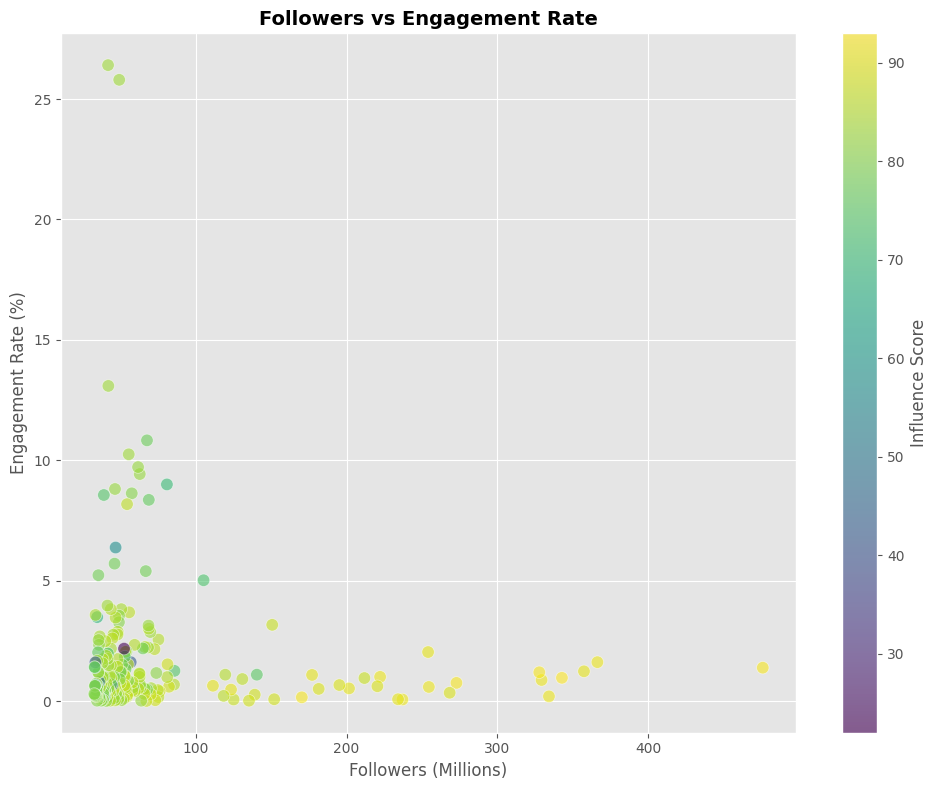

In [11]:
# Followers vs Engagement
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df['followers']/1e6, df['60_day_eng_rate'],
                     c=df['influence_score'], cmap='viridis',
                     s=80, alpha=0.6, edgecolors='white', linewidth=0.5)
ax.set_xlabel('Followers (Millions)', fontsize=12)
ax.set_ylabel('Engagement Rate (%)', fontsize=12)
ax.set_title('Followers vs Engagement Rate', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter)
cbar.set_label('Influence Score')
plt.tight_layout()
plt.savefig('visualizations/03_followers_vs_engagement.png', dpi=150)
plt.show()

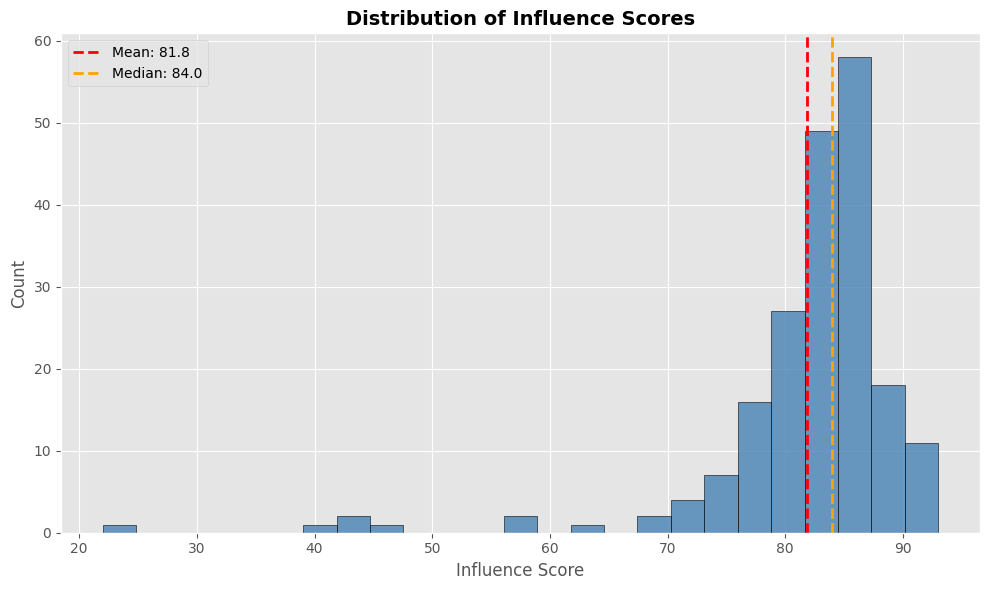

In [12]:
# Influence score distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['influence_score'], bins=25, color='steelblue', edgecolor='black', alpha=0.8)
ax.axvline(df['influence_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["influence_score"].mean():.1f}')
ax.axvline(df['influence_score'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["influence_score"].median():.1f}')
ax.set_xlabel('Influence Score', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Influence Scores', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig('visualizations/04_influence_score_dist.png', dpi=150)
plt.show()

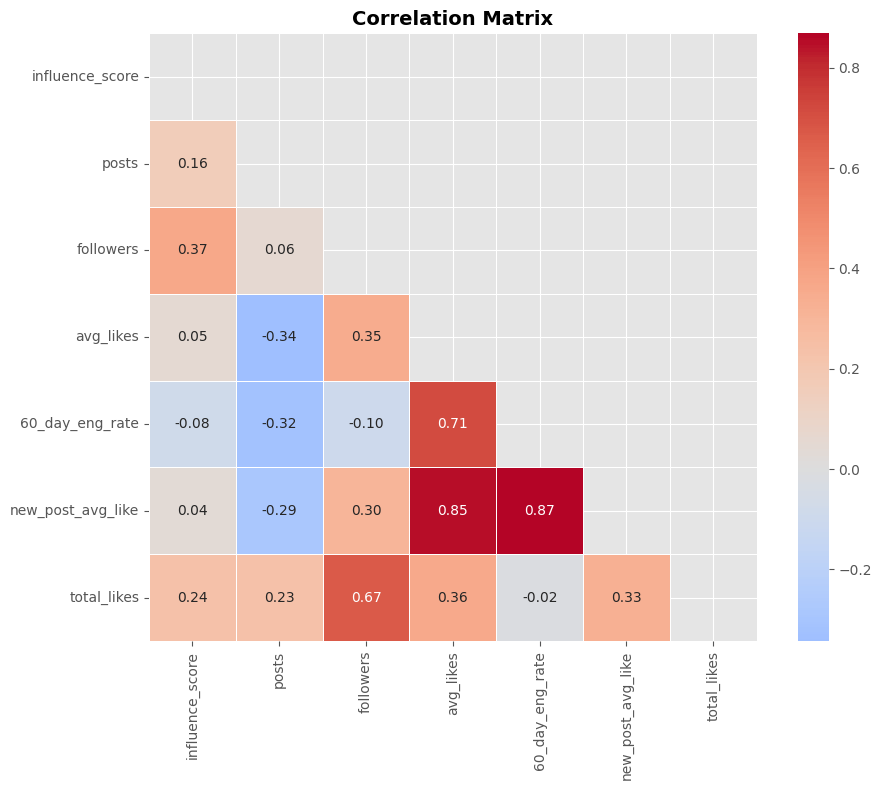

In [13]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
numeric_cols = ['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/05_correlation_matrix.png', dpi=150)
plt.show()

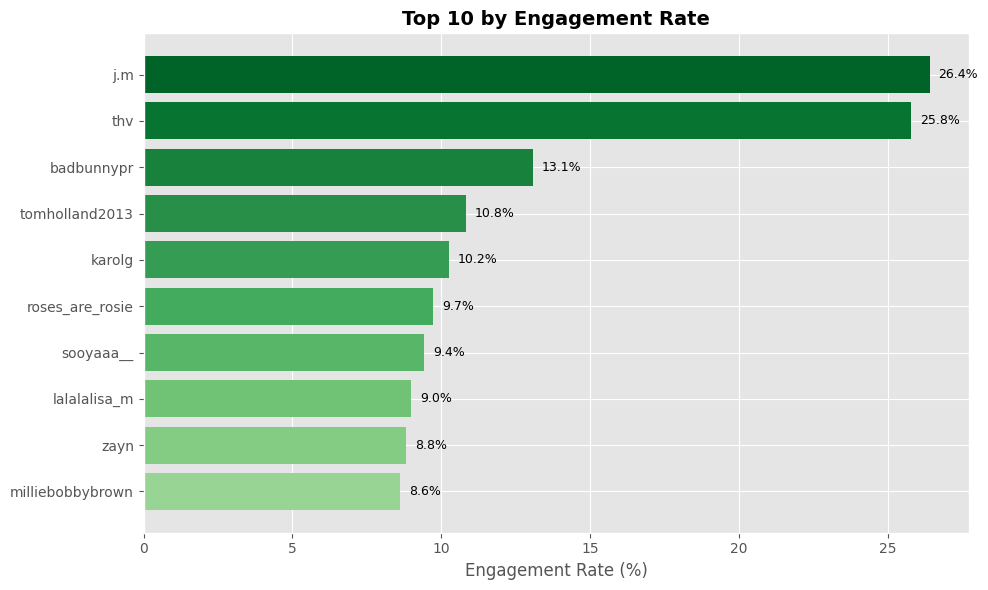

In [14]:
# Top 10 by engagement
fig, ax = plt.subplots(figsize=(10, 6))
top_eng = df.nlargest(10, '60_day_eng_rate')
colors = plt.cm.Greens(np.linspace(0.4, 0.9, 10))[::-1]
bars = ax.barh(top_eng['channel_info'], top_eng['60_day_eng_rate'], color=colors)
ax.set_xlabel('Engagement Rate (%)', fontsize=12)
ax.set_title('Top 10 by Engagement Rate', fontsize=14, fontweight='bold')
ax.invert_yaxis()
for bar, val in zip(bars, top_eng['60_day_eng_rate']):
    ax.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('visualizations/06_top_engagement.png', dpi=150)
plt.show()

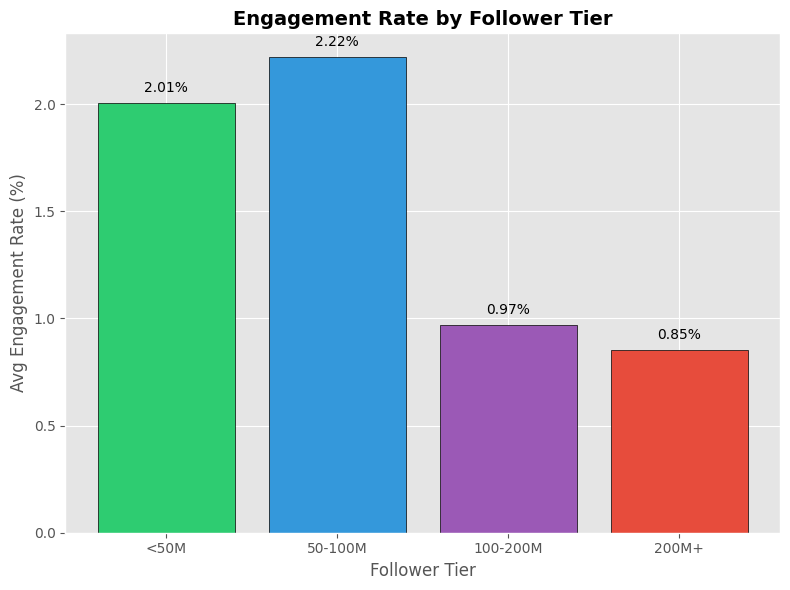

In [15]:
# Engagement by follower tier
df['follower_tier'] = pd.cut(df['followers'],
                              bins=[0, 50e6, 100e6, 200e6, 500e6],
                              labels=['<50M', '50-100M', '100-200M', '200M+'])

fig, ax = plt.subplots(figsize=(8, 6))
tier_eng = df.groupby('follower_tier')['60_day_eng_rate'].mean()
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
bars = ax.bar(tier_eng.index.astype(str), tier_eng.values, color=colors, edgecolor='black')
ax.set_xlabel('Follower Tier', fontsize=12)
ax.set_ylabel('Avg Engagement Rate (%)', fontsize=12)
ax.set_title('Engagement Rate by Follower Tier', fontsize=14, fontweight='bold')
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{bar.get_height():.2f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('visualizations/07_engagement_by_tier.png', dpi=150)
plt.show()

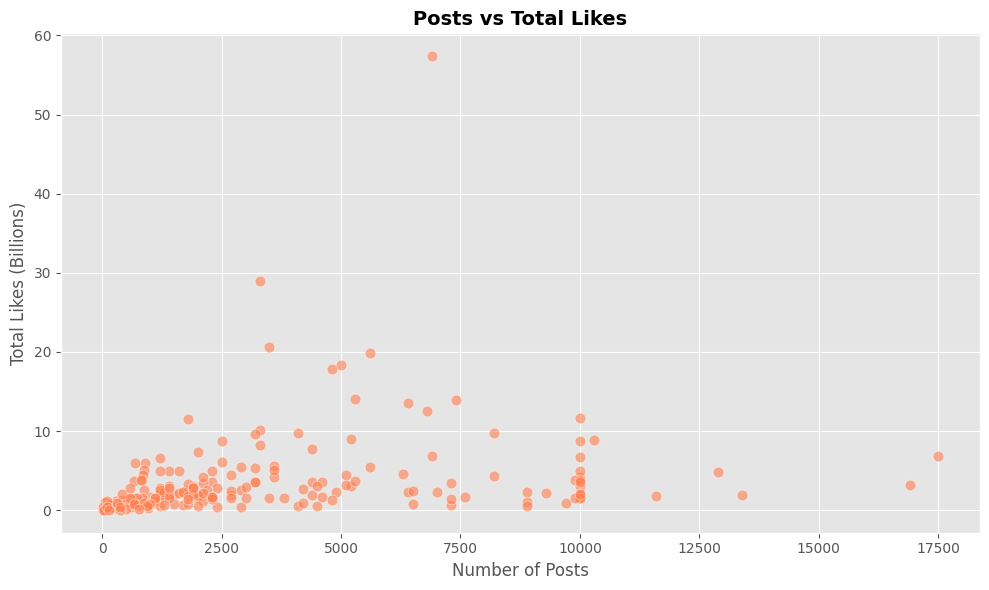

In [16]:
# Posts vs Total Likes
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['posts'], df['total_likes']/1e9, alpha=0.6, s=60, c='coral', edgecolors='white')
ax.set_xlabel('Number of Posts', fontsize=12)
ax.set_ylabel('Total Likes (Billions)', fontsize=12)
ax.set_title('Posts vs Total Likes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/08_posts_vs_likes.png', dpi=150)
plt.show()

## 5. Feature Engineering

In [17]:
df['likes_per_follower'] = df['total_likes'] / df['followers']
df['likes_per_post'] = df['total_likes'] / (df['posts'] + 1)
df['avg_likes_pct'] = (df['avg_likes'] / df['followers']) * 100
df['log_followers'] = np.log10(df['followers'])

df['eng_category'] = pd.cut(df['60_day_eng_rate'], bins=[0, 1, 3, 100], labels=['Low', 'Medium', 'High'])

le = LabelEncoder()
df['country_code'] = le.fit_transform(df['country'])

print("Features created:")
print("- likes_per_follower")
print("- likes_per_post")
print("- avg_likes_pct")
print("- log_followers")
print("- eng_category")
print("- country_code")

Features created:
- likes_per_follower
- likes_per_post
- avg_likes_pct
- log_followers
- eng_category
- country_code


In [18]:
df.to_csv('data/featured_data.csv', index=False)
print("Saved featured data")

Saved featured data


In [19]:
df['eng_category'].value_counts()

,count
eng_category,
Low,109
Medium,61
High,30


## 6. Machine Learning - Regression

In [20]:
features = ['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'likes_per_follower', 'country_code']
X = df[features].fillna(0)
y = df['influence_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 160, Test: 40


In [21]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression -> R2: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")

Linear Regression -> R2: 0.0462, RMSE: 12.70


In [22]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train_sc, y_train)
y_pred_rf = rf.predict(X_test_sc)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest -> R2: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")

Random Forest -> R2: -0.0038, RMSE: 13.03


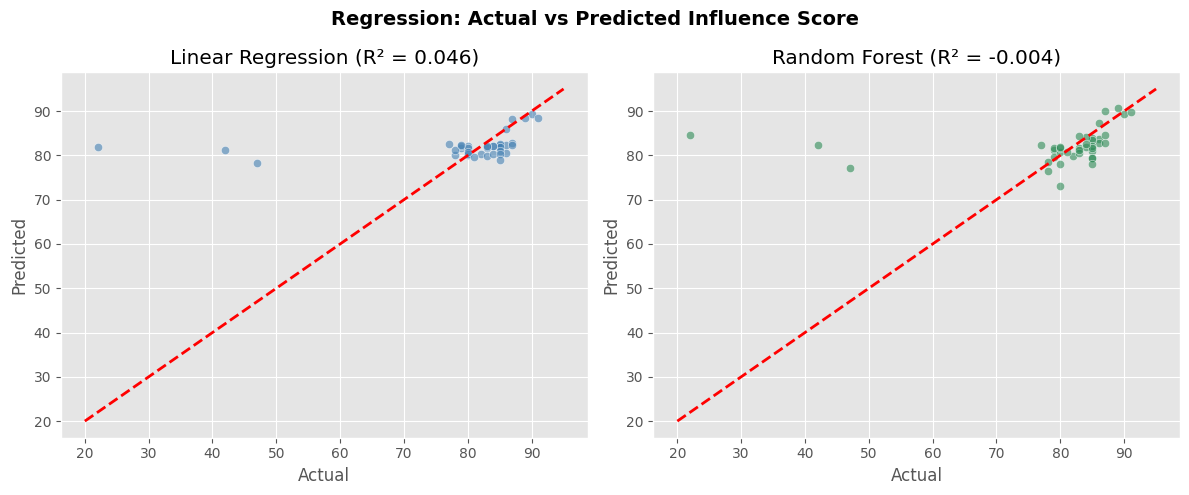

In [23]:
# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_test, y_pred_lr, alpha=0.6, c='steelblue', edgecolors='white')
axes[0].plot([20, 95], [20, 95], 'r--', linewidth=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title(f'Linear Regression (R² = {r2_lr:.3f})')

axes[1].scatter(y_test, y_pred_rf, alpha=0.6, c='seagreen', edgecolors='white')
axes[1].plot([20, 95], [20, 95], 'r--', linewidth=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title(f'Random Forest (R² = {r2_rf:.3f})')

plt.suptitle('Regression: Actual vs Predicted Influence Score', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/09_regression_results.png', dpi=150)
plt.show()

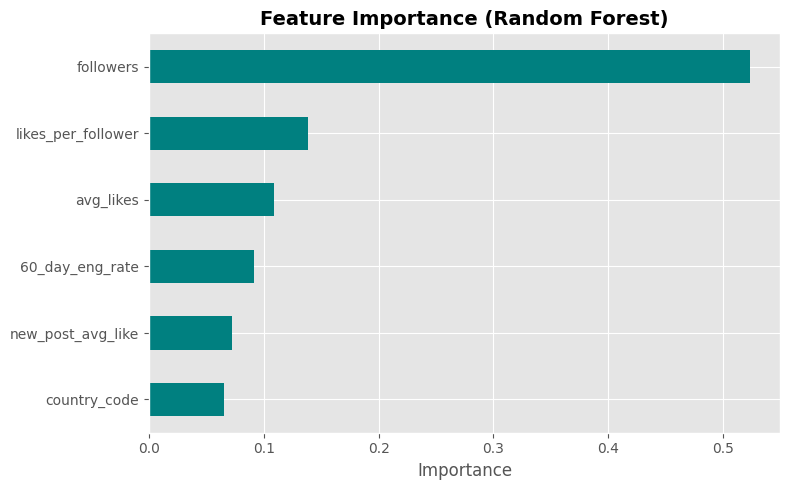

In [24]:
# Feature importance
fig, ax = plt.subplots(figsize=(8, 5))
importance = pd.Series(rf.feature_importances_, index=features).sort_values()
importance.plot(kind='barh', color='teal', ax=ax)
ax.set_xlabel('Importance')
ax.set_title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/10_feature_importance.png', dpi=150)
plt.show()

## 7. Machine Learning - Classification

In [25]:
df_class = df.dropna(subset=['eng_category'])
X_c = df_class[['followers', 'influence_score', 'country_code', 'log_followers', 'avg_likes_pct']].fillna(0)
y_c = df_class['eng_category']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

scaler_c = StandardScaler()
X_train_c_sc = scaler_c.fit_transform(X_train_c)
X_test_c_sc = scaler_c.transform(X_test_c)

print(f"Train: {len(X_train_c)}, Test: {len(X_test_c)}")

Train: 160, Test: 40


In [26]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
clf.fit(X_train_c_sc, y_train_c)
y_pred_c = clf.predict(X_test_c_sc)

acc = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {acc*100:.1f}%")

Accuracy: 75.0%


In [27]:
print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

        High       0.62      0.83      0.71         6
         Low       0.89      0.77      0.83        22
      Medium       0.62      0.67      0.64        12

    accuracy                           0.75        40
   macro avg       0.71      0.76      0.73        40
weighted avg       0.77      0.75      0.76        40



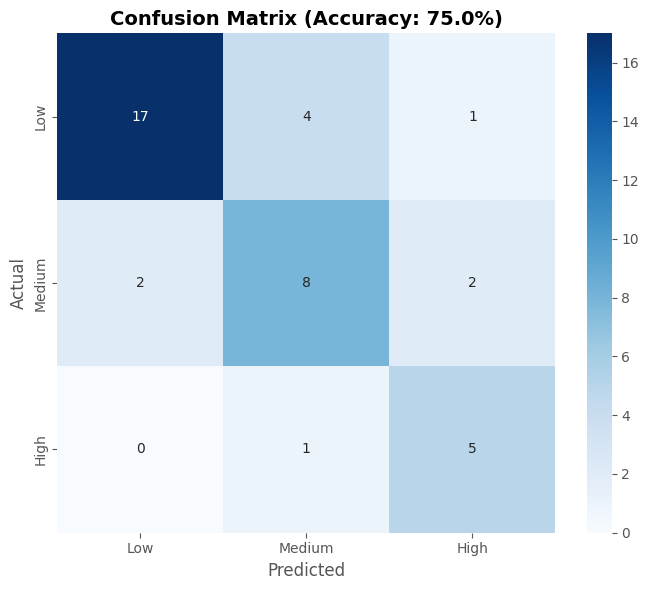

In [28]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(7, 6))
cm = confusion_matrix(y_test_c, y_pred_c, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'], ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(f'Confusion Matrix (Accuracy: {acc*100:.1f}%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('visualizations/11_confusion_matrix.png', dpi=150)
plt.show()

## 8. Dashboard

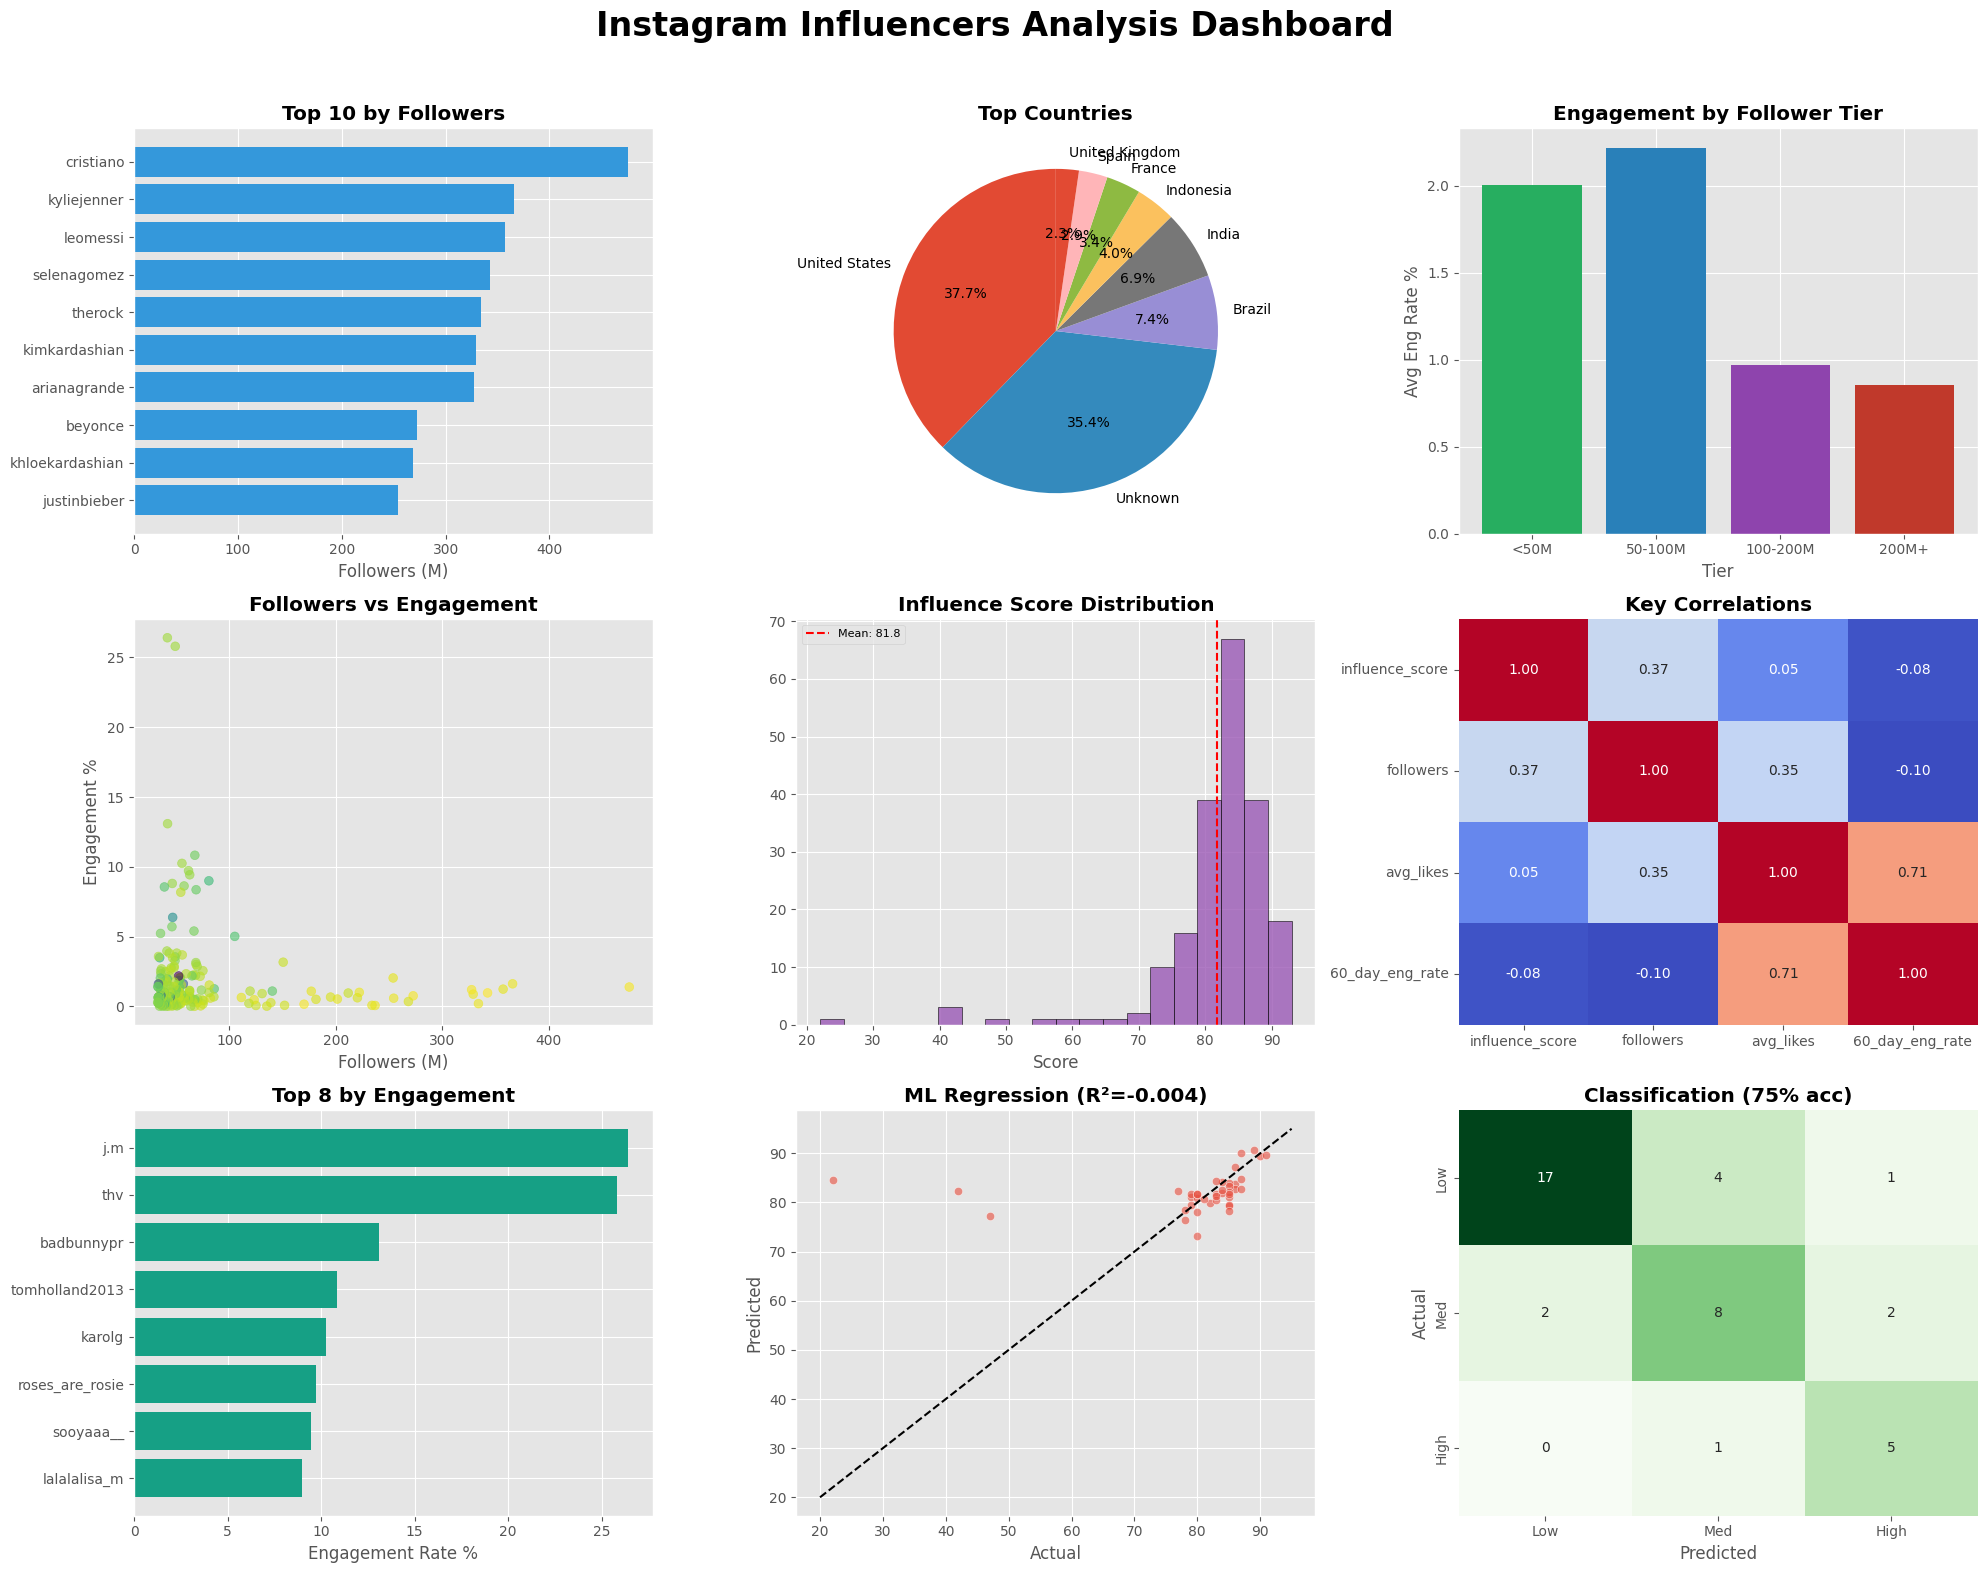

In [29]:
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Instagram Influencers Analysis Dashboard', fontsize=24, fontweight='bold', y=0.98)

# 1. Top 10 followers
ax1 = fig.add_subplot(3, 3, 1)
top10 = df.nlargest(10, 'followers')
ax1.barh(top10['channel_info'], top10['followers']/1e6, color='#3498db')
ax1.set_xlabel('Followers (M)')
ax1.set_title('Top 10 by Followers', fontweight='bold')
ax1.invert_yaxis()

# 2. Country pie
ax2 = fig.add_subplot(3, 3, 2)
top_countries = df['country'].value_counts().head(8)
ax2.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Top Countries', fontweight='bold')

# 3. Engagement by tier
ax3 = fig.add_subplot(3, 3, 3)
tier_data = df.groupby('follower_tier')['60_day_eng_rate'].mean()
ax3.bar(tier_data.index.astype(str), tier_data.values, color=['#27ae60', '#2980b9', '#8e44ad', '#c0392b'])
ax3.set_xlabel('Tier')
ax3.set_ylabel('Avg Eng Rate %')
ax3.set_title('Engagement by Follower Tier', fontweight='bold')

# 4. Scatter
ax4 = fig.add_subplot(3, 3, 4)
ax4.scatter(df['followers']/1e6, df['60_day_eng_rate'], c=df['influence_score'], cmap='viridis', alpha=0.6, s=40)
ax4.set_xlabel('Followers (M)')
ax4.set_ylabel('Engagement %')
ax4.set_title('Followers vs Engagement', fontweight='bold')

# 5. Influence hist
ax5 = fig.add_subplot(3, 3, 5)
ax5.hist(df['influence_score'], bins=20, color='#9b59b6', edgecolor='black', alpha=0.8)
ax5.axvline(df['influence_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["influence_score"].mean():.1f}')
ax5.set_xlabel('Score')
ax5.set_title('Influence Score Distribution', fontweight='bold')
ax5.legend(fontsize=8)

# 6. Correlation
ax6 = fig.add_subplot(3, 3, 6)
small_corr = df[['influence_score', 'followers', 'avg_likes', '60_day_eng_rate']].corr()
sns.heatmap(small_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax6, cbar=False)
ax6.set_title('Key Correlations', fontweight='bold')

# 7. Top engagement
ax7 = fig.add_subplot(3, 3, 7)
top_eng = df.nlargest(8, '60_day_eng_rate')
ax7.barh(top_eng['channel_info'], top_eng['60_day_eng_rate'], color='#16a085')
ax7.set_xlabel('Engagement Rate %')
ax7.set_title('Top 8 by Engagement', fontweight='bold')
ax7.invert_yaxis()

# 8. Regression
ax8 = fig.add_subplot(3, 3, 8)
ax8.scatter(y_test, y_pred_rf, alpha=0.6, c='#e74c3c', edgecolors='white')
ax8.plot([20, 95], [20, 95], 'k--', linewidth=1.5)
ax8.set_xlabel('Actual')
ax8.set_ylabel('Predicted')
ax8.set_title(f'ML Regression (R²={r2_rf:.3f})', fontweight='bold')

# 9. Classification
ax9 = fig.add_subplot(3, 3, 9)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low', 'Med', 'High'],
            yticklabels=['Low', 'Med', 'High'], ax=ax9, cbar=False)
ax9.set_xlabel('Predicted')
ax9.set_ylabel('Actual')
ax9.set_title(f'Classification ({acc*100:.0f}% acc)', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('visualizations/12_dashboard.png', dpi=200)
plt.show()

## 9. Key Findings

In [30]:
high_f = df[df['followers'] > 100e6]['60_day_eng_rate'].mean()
low_f = df[df['followers'] < 50e6]['60_day_eng_rate'].mean()

print("="*50)
print("KEY FINDINGS")
print("="*50)
print(f"""
1. ENGAGEMENT PARADOX
   - High followers (>100M): {high_f:.2f}% avg engagement
   - Lower followers (<50M): {low_f:.2f}% avg engagement
   - Smaller accounts have ~{low_f/high_f:.1f}x higher engagement!

2. TOP PERFORMERS
   - Most followers: {df.loc[df['followers'].idxmax(), 'channel_info']} ({df['followers'].max()/1e6:.1f}M)
   - Highest engagement: {df.loc[df['60_day_eng_rate'].idxmax(), 'channel_info']} ({df['60_day_eng_rate'].max():.1f}%)
   - Top influence score: {df.loc[df['influence_score'].idxmax(), 'channel_info']} ({df['influence_score'].max()})

3. GEOGRAPHIC DISTRIBUTION
   - USA dominates with {(df['country']=='United States').sum()} influencers
   - {df['country'].nunique()} countries represented

4. ML RESULTS
   - Regression R²: {r2_rf:.3f}
   - Classification accuracy: {acc*100:.1f}%
""")

KEY FINDINGS

1. ENGAGEMENT PARADOX
   - High followers (>100M): 0.91% avg engagement
   - Lower followers (<50M): 2.01% avg engagement
   - Smaller accounts have ~2.2x higher engagement!

2. TOP PERFORMERS
   - Most followers: cristiano (475.8M)
   - Highest engagement: j.m (26.4%)
   - Top influence score: selenagomez (93)

3. GEOGRAPHIC DISTRIBUTION
   - USA dominates with 66 influencers
   - 26 countries represented
   
4. ML RESULTS
   - Regression R²: -0.004
   - Classification accuracy: 75.0%

